<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Walmart Data Analysis </title>
    <style>
        body {
            font-family: Arial, sans-serif;
            color: #444;
            background-color: #f7f7f7;
            padding: 20px;
        }
        h1, h2 {
            color: #cc6600;
        }
        h3 {
            color: #0066cc;
        }
        ul {
            list-style-type: none;
            padding: 0;
        }
        li {
            margin-bottom: 10px;
        }
        a {
            color: #009933;
            text-decoration: none;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>

<center><h1>Walmart Data Analysis</h1></center>

<h2>Project Overview:</h2>
<ul>
    <li>This project involves analyzing sales data from Walmart in order to gain insights into various aspects of their business operations, including product performance, customer trends, and market demand.</li>

</ul>

<h2>Dataset Details:</h2>
<ul>
    <li>Dataset Link: <a href="https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting" target="_blank">Walmart Recruiting - Store Sales Forecasting</a></li>
</ul>

<h2>Steps to Set Up and Run the Project:</h2>
<ol>
    <li><strong>Create a MySQL Database</strong>:
        <ul>
            <li>Open MySQL Workbench or any preferred MySQL client.</li>
            <li>Execute the SQL command: <code>CREATE DATABASE IF NOT EXISTS walmart;</code>.</li>
        </ul>
    </li>
    <li><strong>Update Connection Details</strong>:
        <ul>
            <li>Open <code>db_connection.py</code>.</li>
            <li>Modify connection parameters with your MySQL server details.</li>
        </ul>
    </li>
    <li><strong>Create Database Structure</strong>:
        <ul>
            <li>Run <code>send_data_to_mysql.py</code> to create the necessary table structure.</li>
        </ul>
    </li>
    <li><strong>Verify Database Connection</strong>:
        <ul>
            <li>Run <code>access_data_from_mysql.py</code> to ensure the connection and data access are successful.</li>
        </ul>
    </li>
    <li><strong>Ensure CSV File</strong>:
        <ul>
            <li>Make sure <code>WalmartSalesData.csv</code> is present in the specified location or update the file path accordingly.</li>
        </ul>
    </li>
</ol>

</body>
</html>


In [1]:
from db_connection import get_connection
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:
conn = get_connection()
cursor = conn.cursor()

 <center><h2>Generic</h2><centwe>

Number of Rows and Columns for future use

In [3]:
sql_row_count_query = "SELECT COUNT(*) FROM walmarttable"
cursor.execute(sql_row_count_query)
num_rows = cursor.fetchone()[0] 

sql_col_count_query = "SELECT COUNT(*) FROM information_schema.columns WHERE table_name = 'walmarttable'"
cursor.execute(sql_col_count_query)
num_cols = cursor.fetchone()[0] 

print("Number of rows in the table:", num_rows)
print("Number of columns in the table:", num_cols)

Number of rows in the table: 1000
Number of columns in the table: 17


1. How many unique cities does the data have?

In [4]:
sql_query = "SELECT COUNT(DISTINCT City) FROM walmartTable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Number of unique cities:", result[0])

Number of unique cities: 3


2. What is the most common payment method?



Most common payment method:
Ewallet: 345 transactions


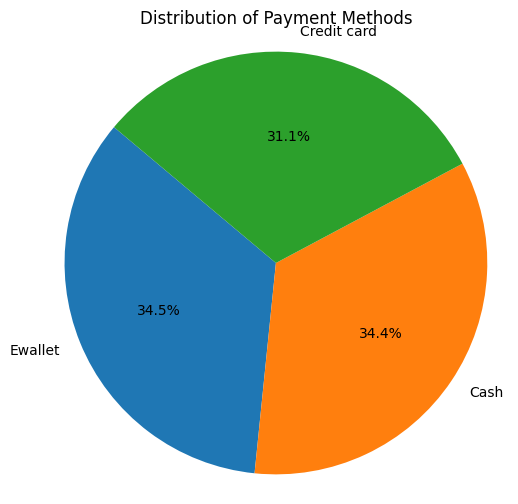

In [5]:
sql_query = "SELECT Payment, COUNT(*) AS Payment_Count FROM walmartTable GROUP BY Payment ORDER BY Payment_Count DESC LIMIT 1"

cursor.execute(sql_query)
result = cursor.fetchall()

print("Most common payment method:")
for row in result:
    print(f"{row[0]}: {row[1]} transactions")

cursor.execute("SELECT Payment, COUNT(*) AS Payment_Count FROM walmartTable GROUP BY Payment")
payments_data = cursor.fetchall()

labels = [row[0] for row in payments_data]
counts = [row[1] for row in payments_data]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.show()

3. How many unique product lines does the data have? and what are they?

In [6]:
sql_query = "SELECT COUNT(DISTINCT Product_line) FROM walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Number of unique product lines:", result[0])

sql_query = "SELECT DISTINCT Product_line FROM walmarttable"
cursor.execute(sql_query)
result1 = cursor.fetchall()  

print("They are: ")
for row in result1:
    print(row[0])  

Number of unique product lines: 6
They are: 
Health and beauty
Electronic accessories
Home and lifestyle
Sports and travel
Food and beverages
Fashion accessories


4. What is the average rating across all transactions?

In [7]:
sql_query = "SELECT SUM(rating) from walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Average rating across all transactions:", result[0]/num_rows)

Average rating across all transactions: 6.9727


5. What is the total revenue across all transactions?

In [8]:
sql_query = "SELECT SUM(Total) from walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Total revenue all transactions:", result[0])

Total revenue all transactions: 322966.7490
